You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[INPUT] Total number of tokens in the dataset: 135099
[INPUT] Average number of tokens per description: 13.01
[INPUT] Maximum number of tokens in a single description: 41
[INPUT] Minimum number of tokens in a single description: 1
[OUTPUT] Total number of tokens in the dataset: 128624
[OUTPUT] Average number of tokens per property: 12.39
[OUTPUT] Maximum number of tokens in a single property: 28
[OUTPUT] Minimum number of tokens in a single property: 5


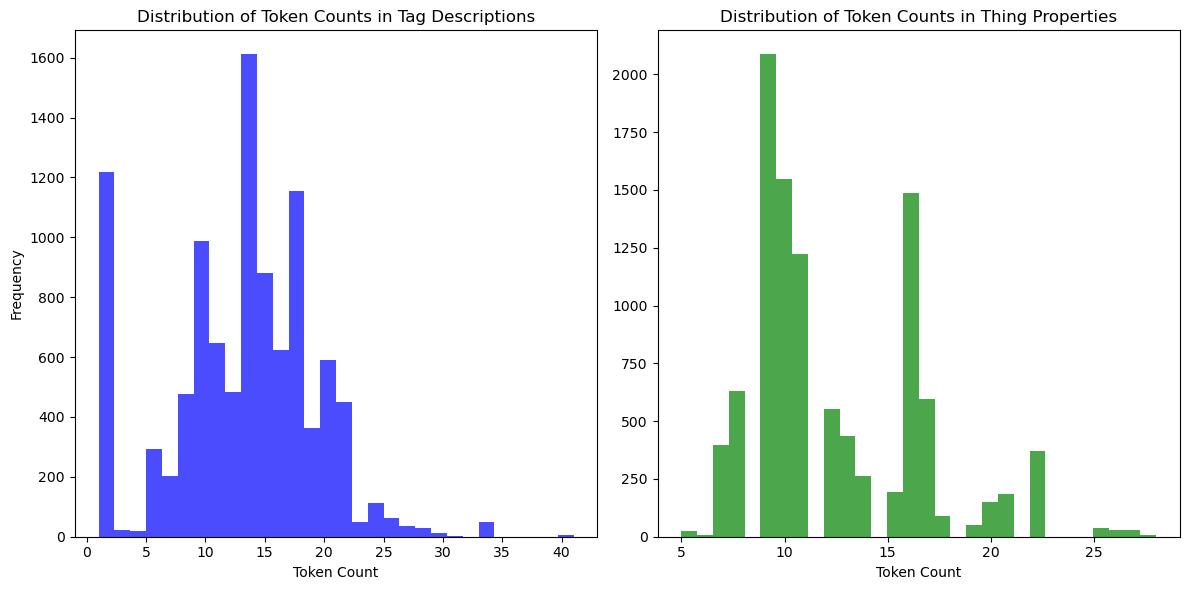

In [1]:
import pandas as pd
from transformers import T5Tokenizer
from collections import Counter
import matplotlib.pyplot as plt

# Load the dataset
try:
    # Try reading with UTF-8 first
    data = pd.read_csv('../select_db/data_mapping_filtered.csv')
except UnicodeDecodeError:
    # If a UnicodeDecodeError occurs, try a different encoding
    data = pd.read_csv('../select_db/data_mapping_filtered.csv', encoding='ISO-8859-1')

data['tag_description'].fillna('No description', inplace=True)  # Fill missing descriptions
data['thing_property'] = data['thing'].astype(str) + "@" + data['property'].astype(str)

# Initialize the T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-small')

# Tokenize descriptions and thing_property
data['tag_description_tokens'] = data['tag_description'].apply(tokenizer.tokenize)
data['thing_property_tokens'] = data['thing_property'].apply(tokenizer.tokenize)

# Calculate token counts for both descriptions and thing_property
token_counts_description = data['tag_description_tokens'].apply(len)
token_counts_thing_property = data['thing_property_tokens'].apply(len)

# Summary statistics for tag descriptions
total_tokens_input = token_counts_description.sum()
mean_tokens_input = token_counts_description.mean()
max_tokens_input = token_counts_description.max()
min_tokens_input = token_counts_description.min()

print(f"[INPUT] Total number of tokens in the dataset: {total_tokens_input}")
print(f"[INPUT] Average number of tokens per description: {mean_tokens_input:.2f}")
print(f"[INPUT] Maximum number of tokens in a single description: {max_tokens_input}")
print(f"[INPUT] Minimum number of tokens in a single description: {min_tokens_input}")

# Summary statistics for thing_property
total_tokens_output = token_counts_thing_property.sum()
mean_tokens_output = token_counts_thing_property.mean()
max_tokens_output = token_counts_thing_property.max()
min_tokens_output = token_counts_thing_property.min()

print(f"[OUTPUT] Total number of tokens in the dataset: {total_tokens_output}")
print(f"[OUTPUT] Average number of tokens per property: {mean_tokens_output:.2f}")
print(f"[OUTPUT] Maximum number of tokens in a single property: {max_tokens_output}")
print(f"[OUTPUT] Minimum number of tokens in a single property: {min_tokens_output}")

# Visualize the distribution of token counts for both tag_description and thing_property
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(token_counts_description, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Token Counts in Tag Descriptions')
plt.xlabel('Token Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(token_counts_thing_property, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Token Counts in Thing Properties')
plt.xlabel('Token Count')

plt.tight_layout()
plt.show()


In [2]:
# Tokenize and count for 'tag_description'
all_tokens_input = [token for desc in data['tag_description'] for token in tokenizer.tokenize(desc)]
token_counter_input = Counter(all_tokens_input)
tokens_input_df = pd.DataFrame(token_counter_input.items(), columns=['Token', 'Frequency'])
tokens_input_df.sort_values(by='Frequency', ascending=False, inplace=True)
tokens_input_df.to_csv('tokens_input.csv', index=False)

# Tokenize and count for 'thing_property'
all_tokens_output = [token for desc in data['thing_property'] for token in tokenizer.tokenize(desc)]
token_counter_output = Counter(all_tokens_output)
tokens_output_df = pd.DataFrame(token_counter_output.items(), columns=['Token', 'Frequency'])
tokens_output_df.sort_values(by='Frequency', ascending=False, inplace=True)
tokens_output_df.to_csv('tokens_output.csv', index=False)

# Print the number of unique token types and status message
num_token_types_input = len(token_counter_input)
num_token_types_output = len(token_counter_output)

print(f"Number of unique token types (Input): {num_token_types_input}")
print(f"Number of unique token types (Output): {num_token_types_output}")
print("Tokens and their frequencies for input have been saved to 'tokens_input.csv'.")
print("Tokens and their frequencies for output have been saved to 'tokens_output.csv'.")

Number of unique token types (Input): 674
Number of unique token types (Output): 185
Tokens and their frequencies for input have been saved to 'tokens_input.csv'.
Tokens and their frequencies for output have been saved to 'tokens_output.csv'.
